In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as stat

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSV_Files/07_Parameter_Estimation.csv")
sample = np.random.choice(df.Speed, size=10, replace=False)
sample_mean = stat.mean(sample)
population_mean = stat.mean(df.Speed)
print("population_mean:",population_mean,"sample_mean:", sample_mean)

population_mean: 6006.1001141552515 sample_mean: 5808


Sample mean vs population

<ipython-input-23-3df7de01d502>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_mean_calculator(x, 30, 100))
<ipython-input-23-3df7de01d502>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<Axes: xlabel='Vehicle Speed', ylabel='Probability'>

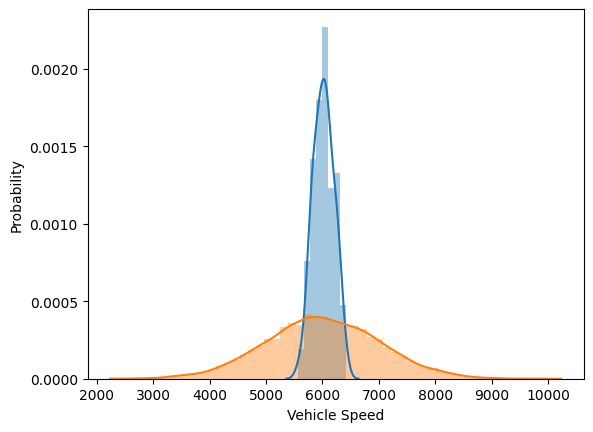

In [23]:
# Book Figure 7-3

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as stat

x = np.random.normal(6000, 1000, size=10000)
def sample_mean_calculator(population_array, sample_size, n_samples):
  sample_means = []
  for i in range(n_samples):
    sample = np.random.choice(population_array, size=sample_size, replace=False)
    sample_mean = stat.mean(sample)
    z = sample_means.append(sample_mean)
    # print(sample_mean)
  return sample_means
sns.distplot(sample_mean_calculator(x, 30, 100))
plt.xlabel('Vehicle Speed')
plt.ylabel('Probability')
sns.distplot(x)


Sample Mean Normality Check





In [24]:
# Book Figures 7-5 and 7-6

from scipy.stats import shapiro
print("Mean of Sample Mean:", np.mean(sample_mean_calculator(x, 30, 1000)))
print("Standard Deviation of Sample Mean:", np.std(sample_mean_calculator(x, 30, 1000)))
shapiro(sample_mean_calculator(x, 30, 1000))

Mean of Sample Mean: 6000.84910106535
Standard Deviation of Sample Mean: 187.41798844636165


ShapiroResult(statistic=0.9982646107673645, pvalue=0.41152986884117126)

Distribution fit

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 29.7 MB/s eta 0:00:00
  Created wheel for fitter: filename=fitter-1.6.0-py3-none-any.whl size=26058 sha256=8de68274dc1c5519b17e7e8c22505ad7725a91a403220771097f374f364a286c
  Stored in directory: /root/.cache/pip/wheels/26/f9/51/059fcaf0ba5aafd94463e31b343453c5cf165cea425f25c0f9
Successfully built fitter
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's depe

Mu: 6007.721049434002 Std: 178.70945166102078


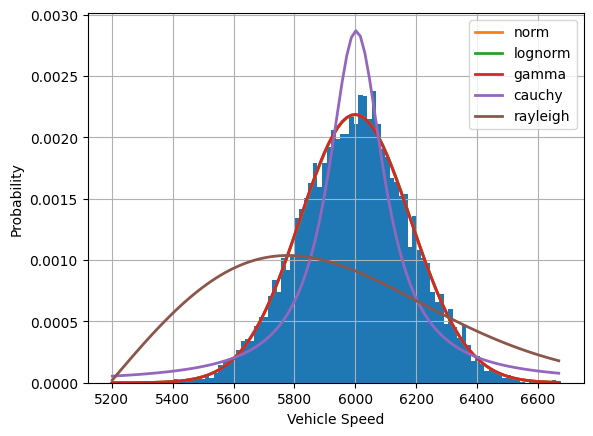

In [26]:
# Book Figure 7-8
from scipy.stats import norm

%pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(sample_mean_calculator(x, 30, 10000),
           distributions= get_common_distributions())
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')
plt.xlabel('Vehicle Speed')
plt.ylabel('Probability')

mu, std = norm.fit(sample_mean_calculator(x, 30, 1000))
print('Mu:', mu,'Std:', std)

Skewed distribution check for CLT




<ipython-input-33-ff6d3cac07bd>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s)


Mean of population: 0.7949572198797343
Standard deviation of population: 0.6017590175709778
Mean of sample mean: 0.7970466291344359
Standard deviation of sample mean: 0.11146330017017753


<ipython-input-33-ff6d3cac07bd>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(sample_mean_calculator(s, 30, 1000))


ShapiroResult(statistic=0.9977890849113464, pvalue=0.20515885949134827)

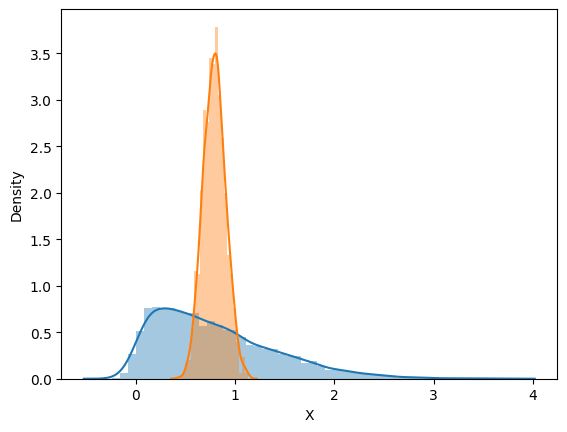

In [33]:
# Book Figure 7-11

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skewnorm
from scipy.stats import shapiro

s = skewnorm.rvs(12, size=10000)
sns.distplot(s)
print('Mean of population:', np.mean(s))
print('Standard deviation of population:',np.std(s))
print("Mean of sample mean:", np.mean(sample_mean_calculator(s, 30, 1000)))
print("Standard deviation of sample mean:", np.std(sample_mean_calculator(s, 30, 1000)))
plt.xlabel('X')
_ = sns.distplot(sample_mean_calculator(s, 30, 1000))
shapiro(sample_mean_calculator(s, 50, 1000))

Two-peak distribution check for CLT


<ipython-input-36-3d413a8ee6dc>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(m)


Mean of population: 2.020206877792308
Standard deviation of population: 2.2421039225764985
Mean of sample mean: 2.0309466271753305
Standard deviation of sample mean: 0.40831054409591905


<ipython-input-36-3d413a8ee6dc>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(sample_mean_calculator(m, 30, 1000))


ShapiroResult(statistic=0.9979579448699951, pvalue=0.26546597480773926)

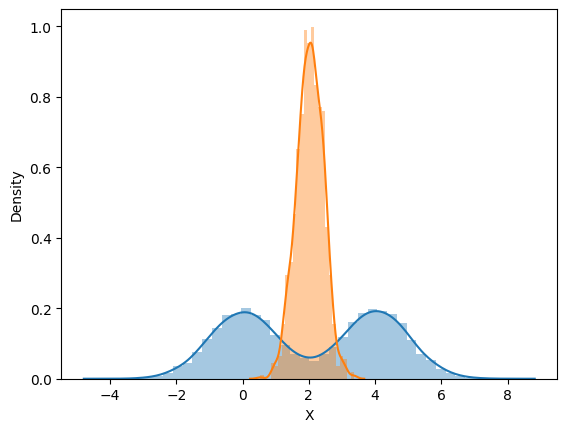

In [36]:
# Book Figure 7-12

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import shapiro

m = np.concatenate((np.random.normal(size=10000), np.random.normal(loc = 4.0, size=10000)))
_ = sns.distplot(m)
print('Mean of population:', np.mean(m))
print('Standard deviation of population:',np.std(m))
print("Mean of sample mean:", np.mean(sample_mean_calculator(m, 30, 1000)))
print("Standard deviation of sample mean:", np.std(sample_mean_calculator(m, 30, 1000)))
plt.xlabel('X')

_ = sns.distplot(sample_mean_calculator(m, 30, 1000))
shapiro(sample_mean_calculator(m, 5, 1000))

CLT application in proabaility calculation

In [37]:
# Book Figure 7-13

import scipy.stats as st
print("Probability of sample mean between +/- 5% of population mean: ", st.norm.cdf(6300,loc=6000,scale=1000/30**0.5)-st.norm.cdf(5700,loc=6000,scale=1000/30**0.5))
print("85 percentile of sample mean : ", st.norm.ppf(0.75,loc=6000,scale=1000/30**0.5))

Probability of sample mean between +/- 5% of population mean:  0.8996517535377093
85 percentile of sample mean :  6123.14441699614


Interval Estimation

In [ ]:
from numpy.random.mtrand import RandomState
# Book Figure 7-16

import numpy as np
import scipy.stats as stats
import random
import math

iteration = 1
b=0
population_ages = stats.norm.rvs(30, 50, size=10000)
sample_size = 3

for _ in range(iteration):
  sample = np.random.choice(a= population_ages, size = sample_size)
  sample_mean = sample.mean()
  print("Sample Mean:",sample.mean())

  z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*

  print("z-critical value:")              # Check the z-critical value
  print(z_critical)

  pop_stdev = population_ages.std()  # Get the population standard deviation

  margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

  confidence_interval = (sample_mean - margin_of_error,
                        sample_mean + margin_of_error)
  if (sample_mean - margin_of_error)>30 or (sample_mean + margin_of_error)<30:
    b+=1

print("Confidence level:", (iteration-b)/iteration*100)
print("Confidence interval:")
print(confidence_interval)

Sample Mean: 15.756392032343447
z-critical value:
1.6448536269514722
confidence level: 100.0
Confidence interval:
(-32.597373139210596, 64.11015720389749)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
